In [ ]:
#meta 1/2/2021 Data augmentation in fast.ai
#src https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa
#This article doesn't focusing much on the code that achieves these transformations. 
#Instead, it visualizes the various transformations available to understand what happens behind the scenes with data augmentation.

#input: 1 file
#output: visualizations


In [24]:
from fastai.vision import *

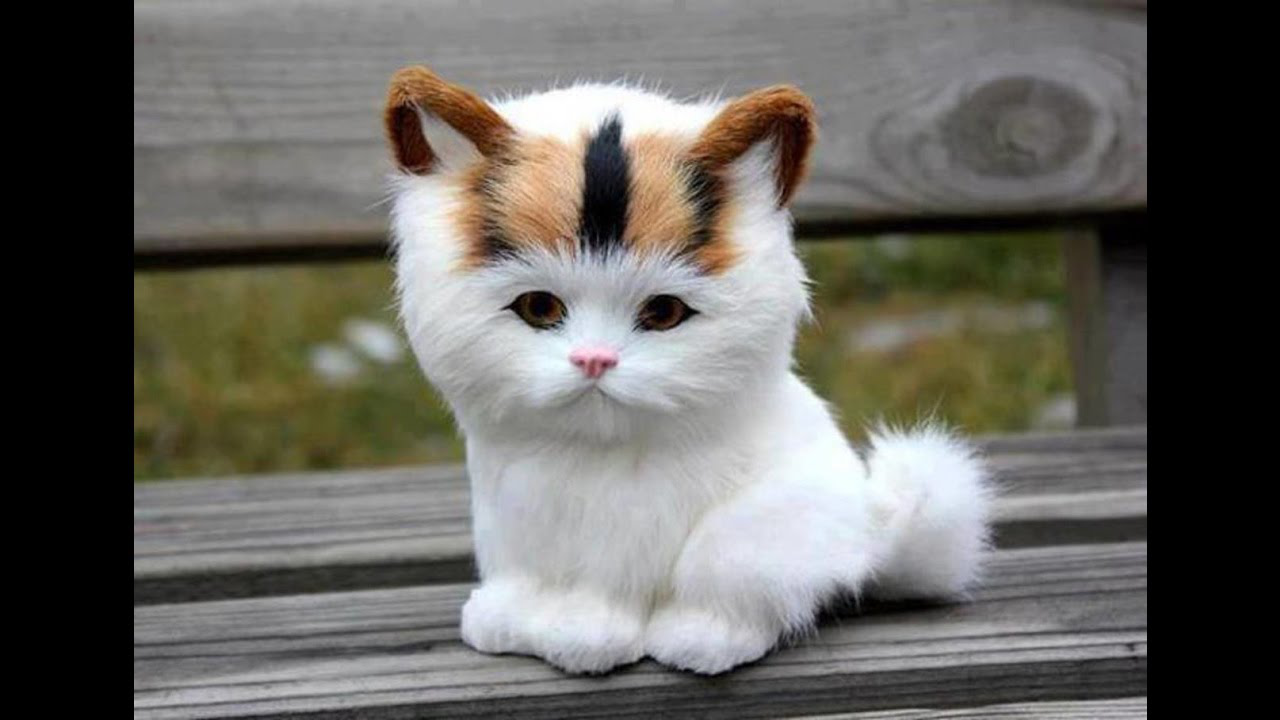

In [45]:
#raw image
open_image('../input/adorable-cat/adorable_cat.jpg')

In [25]:
tfms = get_transforms(max_rotate=25)

In [26]:
len(tfms)

2

In [27]:
#def get_ex(): return open_image('../input/adorable-child/adorable-child.jpg')
def get_ex(): return open_image('../input/adorable-cat/adorable_cat.jpg')

In [28]:
def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

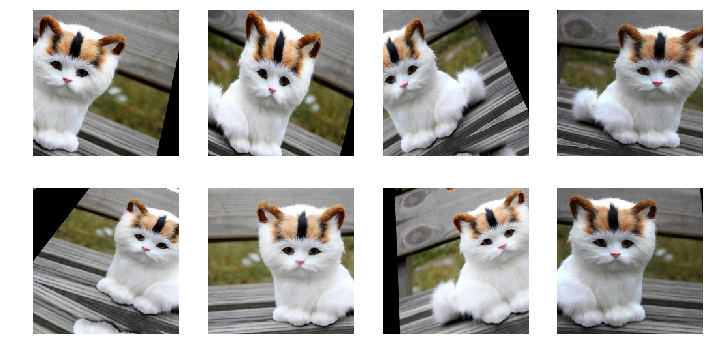

In [29]:
plots_f(2, 4, 12, 6, size=224)

In [46]:
tfms = zoom_crop(scale=(0.75,2), do_rand=True)
#tfms = zoom_crop(scale=(0.75,2), do_rand=False)

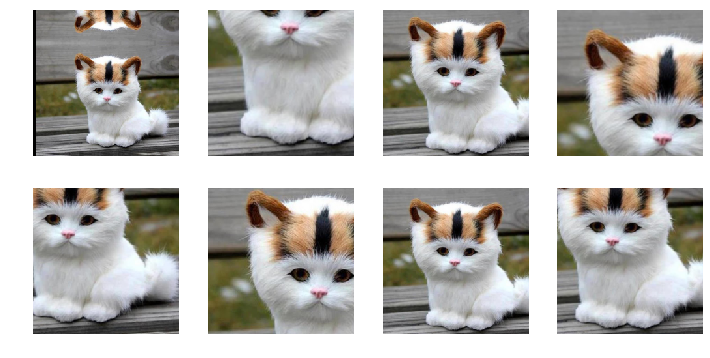

In [47]:
# random zoom and crop
plots_f(2, 4, 12, 6, size=224)

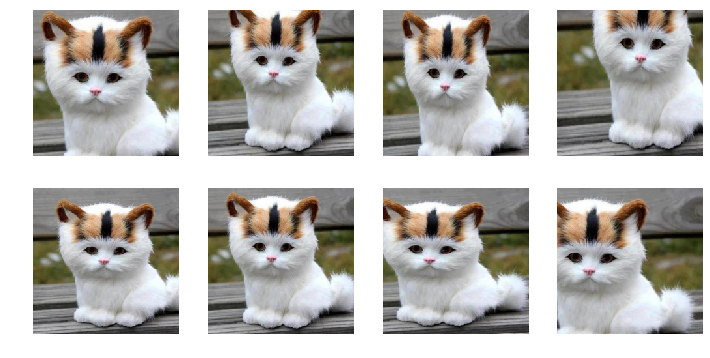

In [32]:
# random resize and crop
tfms = [rand_resize_crop(224)]
plots_f(2, 4, 12, 6, size=224)

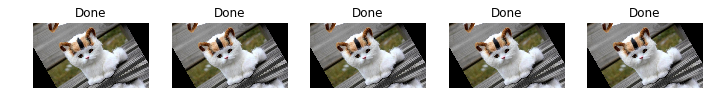

In [33]:
# passing a probability to a function
tfm = [rotate(degrees=30, p=0.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)

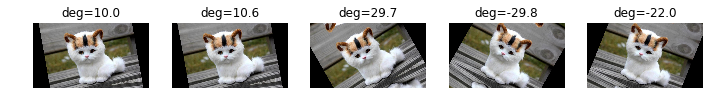

In [34]:
tfm = [rotate(degrees=(-30,30))]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)

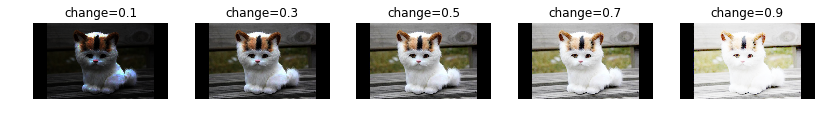

In [35]:
# brightness
fig, axs = plt.subplots(1,5,figsize=(14,8))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

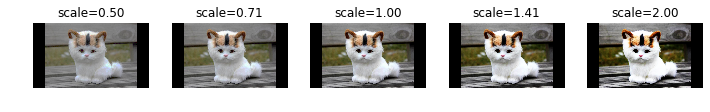

In [36]:
# contrast
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

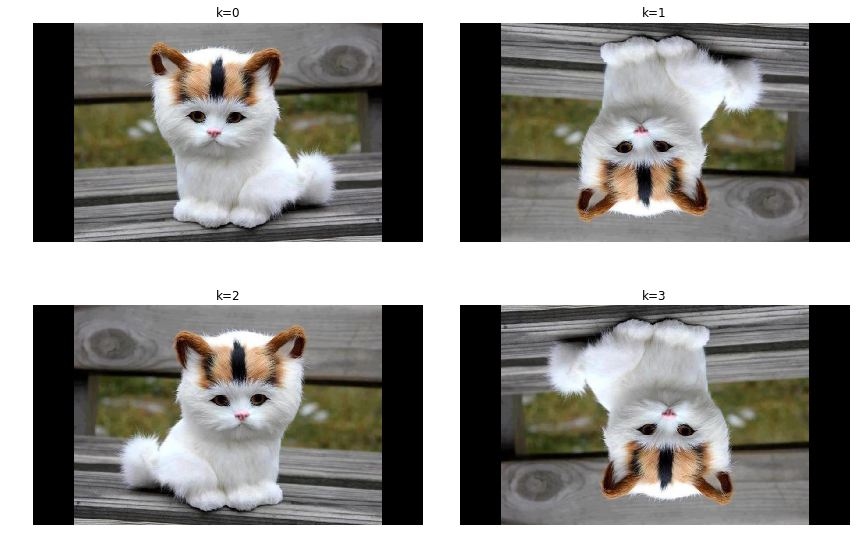

In [37]:
# dihedral
fig, axs = plt.subplots(2,2,figsize=(12,8))
for k, ax in enumerate(axs.flatten()):
    dihedral(get_ex(), k).show(ax=ax, title=f'k={k}')
plt.tight_layout()

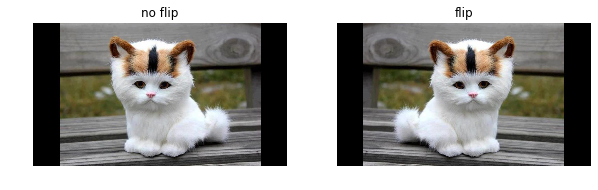

In [38]:
fig, axs = plt.subplots(1,2,figsize=(10,8))
get_ex().show(ax=axs[0], title=f'no flip')
flip_lr(get_ex()).show(ax=axs[1], title=f'flip')

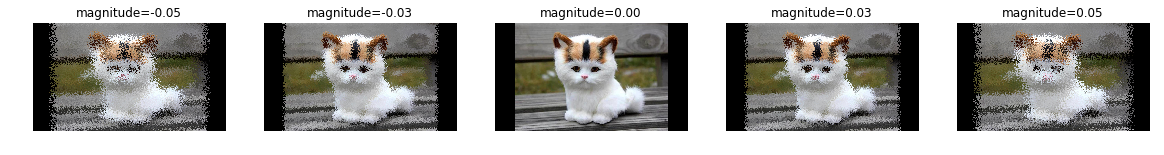

In [39]:
# jitter
fig, axs = plt.subplots(1,5,figsize=(20,8))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')

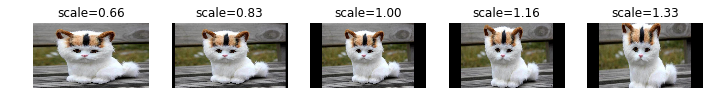

In [40]:
# squish
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(0.66,1.33,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')

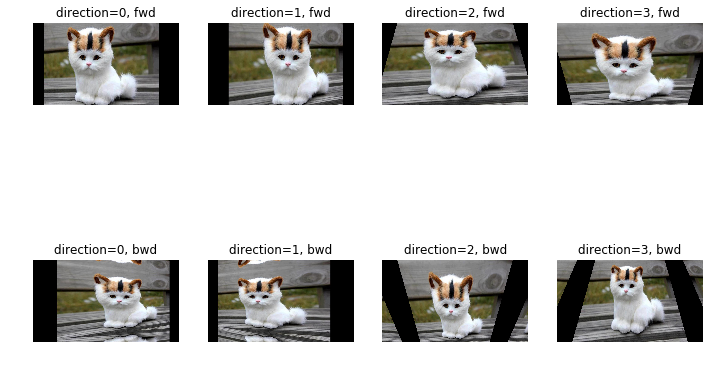

In [41]:
# tilt
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i in range(4):
    get_ex().tilt(i, 0.4).show(ax=axs[0,i], title=f'direction={i}, fwd')
    get_ex().tilt(i, -0.4).show(ax=axs[1,i], title=f'direction={i}, bwd')

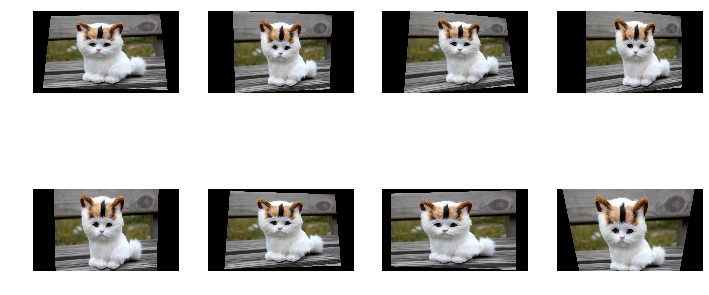

In [42]:
# symm warp
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='zeros')
    img.show(ax=ax)